# 分类问题 -- KNN Algorithm -- k Nearest Neighbors

<font size = 4><font color='red'>Classification Problem</font>：**Supervised learning** with a **qualitative** or **categorical response**.

In [1]:
import numpy as np
import operator

### Input:  

idx: vector to compare to existing dataset -- N维(1xN)
        
dataset: size M data set of known vectors -- M条数据 (NxM)
        
labels: data set labels (1xM vector) -- M条数据的类别

k: number of neighbors to use for comparison (should be an odd number)

### Output: 

the most popular class label

In [2]:
def classify0(idx, dataset, labels, k):
    dataset_size = dataset.shape[0]
    diff_mat = np.tile(idx, (dataset_size,1)) - dataset
    sq_diff_mat = diff_mat**2
    sq_dist = sq_diff_mat.sum(axis=1)         # 计算得到与其他每条数据的距离的平方
    dist = sq_dist**0.5
    sorted_dist_indicies = dist.argsort()     # operator模块中的argsort排序并返回index（用这个模块可能是因为计算比较快）   
    class_count={}          
    for i in range(k):
        vote_label = labels[sorted_dist_indicies[i]]
        class_count[vote_label] = class_count.get(vote_label, 0) + 1
    sorted_class_count = sorted(class_count.items(), key=operator.itemgetter(1), reverse=True)
                                              # operator模块中的itemgetter按照第二个元素的次序对元组进行排列
                                              # sorted函数逆序排序，即为从最大到最小
    return sorted_class_count[0][0]             # 返回最高频的元素标签

In [3]:
# 理解一下np.tile这个函数

a = np.array([0, 1, 2])
print(np.tile(a, 2))
print(np.tile(a, (2, 3)))
print(np.tile(a, (3, 2, 4)))

b = np.array([[1, 2], [3, 4]])
print(np.tile(b, 2))
print(np.tile(b, (2, 3)))
print(np.tile(b, (3, 2, 4)))

# 理解一下get这个函数
dict = {'Name': 'Zabra', 'Age': 7}
dict.get('Name')

[0 1 2 0 1 2]
[[0 1 2 0 1 2 0 1 2]
 [0 1 2 0 1 2 0 1 2]]
[[[0 1 2 0 1 2 0 1 2 0 1 2]
  [0 1 2 0 1 2 0 1 2 0 1 2]]

 [[0 1 2 0 1 2 0 1 2 0 1 2]
  [0 1 2 0 1 2 0 1 2 0 1 2]]

 [[0 1 2 0 1 2 0 1 2 0 1 2]
  [0 1 2 0 1 2 0 1 2 0 1 2]]]
[[1 2 1 2]
 [3 4 3 4]]
[[1 2 1 2 1 2]
 [3 4 3 4 3 4]
 [1 2 1 2 1 2]
 [3 4 3 4 3 4]]
[[[1 2 1 2 1 2 1 2]
  [3 4 3 4 3 4 3 4]
  [1 2 1 2 1 2 1 2]
  [3 4 3 4 3 4 3 4]]

 [[1 2 1 2 1 2 1 2]
  [3 4 3 4 3 4 3 4]
  [1 2 1 2 1 2 1 2]
  [3 4 3 4 3 4 3 4]]

 [[1 2 1 2 1 2 1 2]
  [3 4 3 4 3 4 3 4]
  [1 2 1 2 1 2 1 2]
  [3 4 3 4 3 4 3 4]]]


'Zabra'

<font color='blue'>**关于iteritems()和items()**</font>:
<br>
<br>
<font size=3>dict.items() returns a list of 2-tuples ([(key, value), (key, value), ...]), whereas dict.iteritems() is a generator that yields 2-tuples. 
<br>
<br>
The former takes more space and time initially, but accessing each element is fast, whereas the second takes less space and time initially, but a bit more time in generating each element.
<br>
<br>
但这好像是python2.x的情况了，现在直接用items吧。</font>

## 1. create dataset for test

In [6]:
def createDataSet():
    group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels

In [7]:
group, labels = createDataSet()
print(group)
print(labels)

[[1.  1.1]
 [1.  1. ]
 [0.  0. ]
 [0.  0.1]]
['A', 'A', 'B', 'B']


<font color='blue'>**这里补充一下**</font>：我们可以把以上两个函数存到kNN.py文件里，然后打开终端:

cd到kNN.py的保存路径 -- 打开python -- import kNN -- groups, labels = kNN.createDataSet()

In [8]:
classify0([0,0], group, labels, 3)

'B'

## 2. 约会文本数据示例(Dating Example)
### 2.1 转换数据格式（from text to numpy）

In [11]:
def file_to_matrix(filename):
    fr = open(filename)
    array_of_lines = fr.readlines()
    num_of_lines = len(array_of_lines)         #get the number of lines in the file
    return_mat = np.zeros((num_of_lines,3))       #prepare matrix to return
    class_label_vec = []                       #prepare labels return   
    idx = 0
    for line in array_of_lines:
        line = line.strip()                                # 截取掉每一行的回车字符
        list_from_line = line.split('\t')                  # 没有回车字符后，就可以用tab把line变成list
        return_mat[idx,:] = list_from_line[0:3]            # 很神奇，list[0:3]是取了前三个数，而不是前四个
        class_label_vec.append(int(list_from_line[-1]))    # 前三列是dataset，最后一列是labels
        idx += 1 
    return return_mat, class_label_vec

In [12]:
dating_data_mat, dating_labels = file_to_matrix('/Users/elinabian 1/Desktop/CU-life/summerlearning/mlinaction/datingTestSet.txt')

In [13]:
print(dating_data_mat)
print(dating_labels)

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]
[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 1, 3, 3, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1, 2, 1, 2, 2, 1, 

### 2.2 数据可视化 (Data Visualization)

In [14]:
import matplotlib
import matplotlib.pyplot as plt

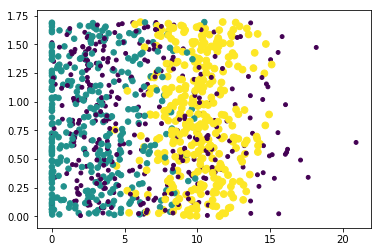

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dating_data_mat[:,1], dating_data_mat[:,2], 15*np.array(dating_labels), 15*np.array(dating_labels))
# 利用dating——labels在散点图上绘制了色彩不等、尺寸不同的点
plt.show()

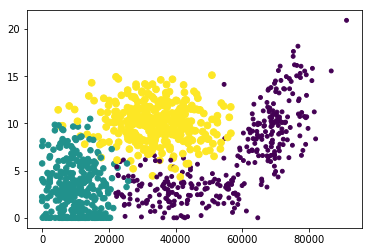

In [17]:
fig2 = plt.figure()
bx = fig2.add_subplot(111)
bx.scatter(dating_data_mat[:,0], dating_data_mat[:,1], 15*np.array(dating_labels), 15*np.array(dating_labels))
plt.show()

<font color = 'green'>**可以看出**</font>：第一、二列较好地将散点分成了三类。。然鹅并不知道想说明什么问题。。
### 2.3 处理数据 (Normalizing Data)
<br>
因为在计算距离的时候，数据大小级别不同，会导致计算结果受到数值绝对差距最大的影响也最大，如果我们想让三个维度权重一样，则需要<font color = 'red'>**归一化**</font>。
<br>
<br>
运用以下方法我们可以把数值转化为0-1之间：new_value = (old_value - min)/(max - min).

In [25]:
def auto_norm(dataset):
    min_val = dataset.min(0)                             # which means dataset.min(axis=0)
    max_val = dataset.max(0)
    ranges = max_val - min_val
    norm_dataset = np.zeros(np.shape(dataset))
    m = dataset.shape[0]
    norm_dataset = dataset - np.tile(min_val, (m,1))
    norm_dataset = norm_dataset/np.tile(ranges, (m,1)) 
    return norm_dataset, ranges, min_val

In [26]:
norm_mat, ranges, min_val = auto_norm(dating_data_mat)
print(norm_mat)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]


### 2.4 Training and Testing

这里把1000条数据根据ho_ratio划分为traing set和test set.

In [27]:
def dating_class_test(ho_ratio = 0.10):      # 默认hold out 10%的数据作为test set
    dating_data_mat, dating_labels = file_to_matrix('/Users/elinabian 1/Desktop/CU-life/summerlearning/mlinaction/datingTestSet.txt')       #load data setfrom file
    norm_mat, ranges, min_val = auto_norm(dating_data_mat)
    m = norm_mat.shape[0]
    num_test = int(m*ho_ratio)
    error_count = 0.0
    for i in range(num_test):
        classifier_result = classify0(norm_mat[i,:], norm_mat[num_test:m,:], dating_labels[num_test:m], 3)
        # 用前num_test行作为test set，第num_test行之后作为training set
        # print("the classifier came back with: %d, the real answer is: %d" % (classifier_result, dating_labels[i]))
        if (classifier_result != dating_labels[i]): 
            error_count += 1
    print("the total error rate is: %f" % (error_count/float(num_test)))

In [28]:
dating_class_test(0.3)

the total error rate is: 0.083333


## 3. 手写识别系统
首先来了解一下数据：每个数字都有200个左右的样本，每个样本是一个手写image（由0、1构成的32x32维数组）。
### 3.1 转换数据格式（from image to numpy）

In [31]:
def img_to_vec(filename):
    fr = open(filename)
    return_vec = np.zeros((1,1024))
    for i in range(32):
        line = fr.readline()       # 注意区分readline()和readlines()
        for j in range(32):
            return_vec[0,32*i+j] = int(line[j])
    return return_vec

In [32]:
test_vec = img_to_vec('/Users/elinabian 1/Desktop/CU-life/summerlearning/mlinaction/digits/trainingDigits/8_52.txt')

In [33]:
print(test_vec[0, 0:31])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


### 3.2 手写识别系统 (Handwritten System Recognization)

In [34]:
from os import listdir     # 可以列出给定目录的文件名

In [37]:
def handwriting_class_test():
    hw_labels = []
    training_file_list = listdir('/Users/elinabian 1/Desktop/CU-life/summerlearning/mlinaction/digits/trainingDigits')             
                                                                   # load the training set
    m = len(training_file_list)
    training_mat = np.zeros((m,1024))
    for i in range(m):
        file_name_str = training_file_list[i]
        file_str = file_name_str.split('.')[0]                     # take off .txt
        class_num_str = int(file_str.split('_')[0])                # split the number and the index of the sample
        hw_labels.append(class_num_str)
        training_mat[i,:] = img_to_vec('/Users/elinabian 1/Desktop/CU-life/summerlearning/mlinaction/digits/trainingDigits/%s' % file_name_str)
    test_file_list = listdir('/Users/elinabian 1/Desktop/CU-life/summerlearning/mlinaction/digits/testDigits')                           # iterate through the test set
    error_count = 0.0
    m_test = len(test_file_list)
    for i in range(m_test):                                        # the same as above
        file_name_str = test_file_list[i]
        file_str = file_name_str.split('.')[0]                     
        class_num_str = int(file_str.split('_')[0])
        vec_under_test = img_to_vec('/Users/elinabian 1/Desktop/CU-life/summerlearning/mlinaction/digits/testDigits/%s' % file_name_str)
        classifier_result = classify0(vec_under_test, training_mat, hw_labels, 3)
        if (classifier_result != class_num_str): 
            error_count += 1.0
    print("\nthe total error rate is: %f" % (error_count/float(m_test)))

In [38]:
handwriting_class_test()


the total error rate is: 0.011628
